# 信頼区間
95%信頼区間は、母集団から標本を採ってきてその平均から95%信頼区間を求める作業を100回やったときに95回はその区間に母平均が含まれる頻度または割合。

## データの読み込み

In [1]:
import pandas as pd

In [2]:
df=pd.read_html("https://bellcurve.jp/statistics/course/8893.html")[0]
df

,No.,都道府県,全スクリーン数
0,1,兵庫,126.0
1,2,大阪,224.0
2,3,奈良,34.0
3,4,岩手,25.0
4,5,千葉,199.0
5,6,茨城,89.0
6,7,福岡,178.0
7,8,山梨,14.0
8,9,滋賀,38.0
9,10,鳥取,11.0


In [3]:
df = df.query("都道府県!='平均'")
df

,No.,都道府県,全スクリーン数
0,1,兵庫,126.0
1,2,大阪,224.0
2,3,奈良,34.0
3,4,岩手,25.0
4,5,千葉,199.0
5,6,茨城,89.0
6,7,福岡,178.0
7,8,山梨,14.0
8,9,滋賀,38.0
9,10,鳥取,11.0


# 分散が分かっている時
分散が分かっている時は求めた平均値に加えて分かっている分散で正規分布を用いて信頼区間を推定する。

In [4]:
import scipy.stats as stats
import numpy as np

In [5]:
arr=df["全スクリーン数"].astype(int).values
#var=np.var(arr)
var=5560
mean=np.mean(arr)
sample_num=len(arr)
nrange=stats.norm(loc=mean,scale=np.sqrt(var/sample_num))
low,high=nrange.interval(alpha=0.95)
print("%.2f<=z<=%.2f"%(low,high))

47.58<=z<=140.02


# 分散が分かっていないとき
分散が分かっていない場合は不偏分散を計測してt分布から信頼区間をt分布から推定する。

In [6]:
var=np.var(arr,ddof=1) #不偏分散
trange=stats.t(loc=mean,scale=np.sqrt(var/sample_num),df=sample_num-1)
low,high=trange.interval(alpha=0.95)
print("%.2f<=t<=%.2f"%(low,high))

35.00<=t<=152.60


# 信頼区間の可視化
実際のデータについてt値を基にmatplotlibで可視化を行う。

In [7]:
import matplotlib.pyplot as plt
df = pd.read_csv("iris.csv")
df.head()

,category,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


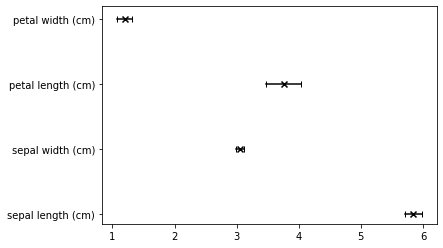

In [8]:
cnt = 0
columns=[]
for col in df.columns:
    if col != "category":
        columns.append(col)
        var = np.var(df[col].values, ddof=1)
        mean = np.mean(df[col].values)
        trange = stats.t(loc=mean, scale=np.sqrt(var/len(df[col].values)), df=len(df[col].values)-1)
        low, high=trange.interval(alpha=0.95)
        plt.plot([low, high], [cnt, cnt], marker="|", color="#000000")
        plt.scatter([mean], [cnt], marker="x" ,color="#000000")
        cnt = cnt + 1
plt.yticks(np.arange(len(columns)), columns)
plt.show()

## 分布の確率
手計算で信頼区間を算出する時は何パーセントの信頼区間かを定義した上で行う。そこで、各代表的な分布における上側%を算出する。

### 標準正規分布

In [9]:
n_01 = np.linspace(0, 0.09, 10)
n_1 = np.linspace(0, 3.9, 40)
Z = []
for row in n_1:
    tmp = []
    for col in n_01:
        tmp.append(1-stats.norm.cdf(row + col))
    Z.append(tmp)
    tmp = []
dfZ = pd.DataFrame(Z)
dfZ.columns = n_01
dfZ.index = n_1
dfZ

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.500000,0.496011,0.492022,0.488034,0.484047,0.480061,0.476078,0.472097,0.468119,0.464144
0.1,0.460172,0.456205,0.452242,0.448283,0.444330,0.440382,0.436441,0.432505,0.428576,0.424655
0.2,0.420740,0.416834,0.412936,0.409046,0.405165,0.401294,0.397432,0.393580,0.389739,0.385908
0.3,0.382089,0.378280,0.374484,0.370700,0.366928,0.363169,0.359424,0.355691,0.351973,0.348268
0.4,0.344578,0.340903,0.337243,0.333598,0.329969,0.326355,0.322758,0.319178,0.315614,0.312067
0.5,0.308538,0.305026,0.301532,0.298056,0.294599,0.291160,0.287740,0.284339,0.280957,0.277595
0.6,0.274253,0.270931,0.267629,0.264347,0.261086,0.257846,0.254627,0.251429,0.248252,0.245097
0.7,0.241964,0.238852,0.235762,0.232695,0.229650,0.226627,0.223627,0.220650,0.217695,0.214764
0.8,0.211855,0.208970,0.206108,0.203269,0.200454,0.197663,0.194895,0.192150,0.189430,0.186733
0.9,0.184060,0.181411,0.178786,0.176186,0.173609,0.171056,0.168528,0.166023,0.163543,0.161087


### t分布

In [10]:
alpha = [0.1, 0.05, 0.025, 0.01, 0.005]
v = np.linspace(1, 30, 30)
tmp = np.array([40, 60, 120, 240])
v = np.hstack((v, tmp))
t = []
for row in v:
    tmp = []
    for col in alpha:
        tmp.append(-stats.t.ppf(col, row))
    t.append(tmp)
    tmp = []
dft = pd.DataFrame(t)
dft.index = v
dft.columns = alpha
dft

,0.100,0.050,0.025,0.010,0.005
1.0,3.077684,6.313752,12.706205,31.820516,63.656741
2.0,1.885618,2.919986,4.302653,6.964557,9.924843
3.0,1.637744,2.353363,3.182446,4.540703,5.840909
4.0,1.533206,2.131847,2.776445,3.746947,4.604095
5.0,1.475884,2.015048,2.570582,3.364930,4.032143
6.0,1.439756,1.943180,2.446912,3.142668,3.707428
7.0,1.414924,1.894579,2.364624,2.997952,3.499483
8.0,1.396815,1.859548,2.306004,2.896459,3.355387
9.0,1.383029,1.833113,2.262157,2.821438,3.249836
10.0,1.372184,1.812461,2.228139,2.763769,3.169273
